In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob
##import re, string, unicodedata
import nltk
##import contractions
##import inflect
 ## from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [78]:
## import the dataset
amz_reviews = pd.read_csv("1429_1.csv")

C:\Users\aakas\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
amz_reviews.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [39]:
amz_reviews.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [40]:
amz_reviews.shape

(34660, 21)

In [41]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs']



In [80]:
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))

In [81]:
df.shape

(34660, 6)

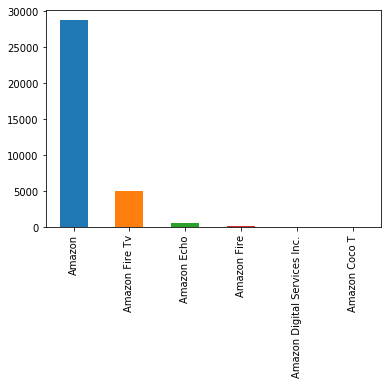

In [82]:
df.brand.value_counts().plot(kind = "bar")

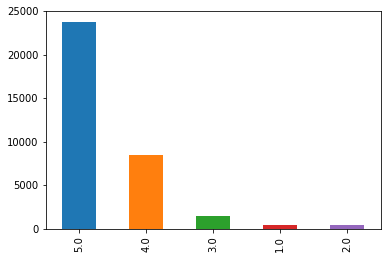

In [83]:
df['reviews.rating'].value_counts().plot(kind='bar')

In [84]:
df.head(3)

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,truman
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ


In [85]:
df['nchar'] = df['reviews.text'].str.len()

In [86]:
df.head()

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143.0
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,truman,75.0
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131.0
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593.0
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613.0


In [87]:
df['nchar'].describe()

count    34659.000000
mean       159.047434
std        185.837884
min          3.000000
25%         70.000000
50%        106.000000
75%        183.000000
max      10670.000000
Name: nchar, dtype: float64

In [88]:
df[df['reviews.rating'] == 1]

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
126,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,Brandon,1080.0
169,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,I bought this tablet for my 4 year old daughte...,Ended up returning,Mijenx,123.0
241,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,Didn't want to go to the sites amazon wanted m...,returned item,turtle,51.0
297,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,This Kindle is so overloaded with apps that I ...,Too may preloaded useless apps,HDelbrucke,480.0
310,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,I liked it at first except the browser is kind...,Broke in 5 mos,Jimbo,384.0
338,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,"If ads dont bother you, then this may be a dec...",Ads ads and ads,Rach,361.0
490,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,"not good, hate it , never buy it again, sucks....",hate it,khob,51.0
607,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,This is not a bad product. Amazon offers great...,More ideal for a child or teen.,Jerry,193.0
633,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,We bought this earlier on line from another ve...,product works real well.,jerbear,98.0
663,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,Freeze frequently... No way to trouble shoot o...,Very poor.,RayAraya,60.0


In [51]:
df.isnull().sum()

brand                0
categories           0
reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
nchar                1
dtype: int64

In [52]:
words = nltk.word_tokenize('this is sparta')

In [53]:
df = df.dropna(inplace=False)

In [54]:
df.head()

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143.0
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,truman,75.0
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131.0
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593.0
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613.0


In [91]:
df['reviews.text'] = df['reviews.text'].astype(str)

In [92]:
df['reviews.text'][2]

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [93]:
## To lower case everything
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [94]:
df['reviews.text'][2]

'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

In [95]:
## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')

In [96]:
df['reviews.text'][2]

'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

In [97]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]

'inexpensive tablet use learn step nabi thrilled learn skype already'

In [62]:
most = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
most

great     11719
tablet     8957
use        7582
love       6573
easy       6127
amazon     5657
kindle     5221
bought     5044
good       4993
one        4928
dtype: int64

In [63]:
most = list(most.index)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
df['reviews.text'].head()

0    product far disappointed children like ability...
1               beginner experienced person gift loves
2    inexpensive learn step nabi thrilled learn sky...
3    ive fire hd 8 two weeks valuewe prime members ...
4    grand daughter comes visit set user entered ag...
Name: reviews.text, dtype: object

In [64]:
df['reviews.text'][4]

'grand daughter comes visit set user entered age name makes sure accesses sites content appropriate age simple loves capabilities also installed 64gig sd card gives little plenty storage price think best spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction cost'

In [65]:
most2 = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
most2

fire       4775
price      4130
like       3796
product    3523
tv         3211
would      3176
works      3089
get        2978
echo       2862
much       2763
dtype: int64

In [66]:
from textblob import TextBlob


In [67]:
TextBlob(df['reviews.text'][1]).words

WordList(['beginner', 'experienced', 'person', 'gift', 'loves'])

In [102]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [103]:
df['reviews.text'][2]

'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [104]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

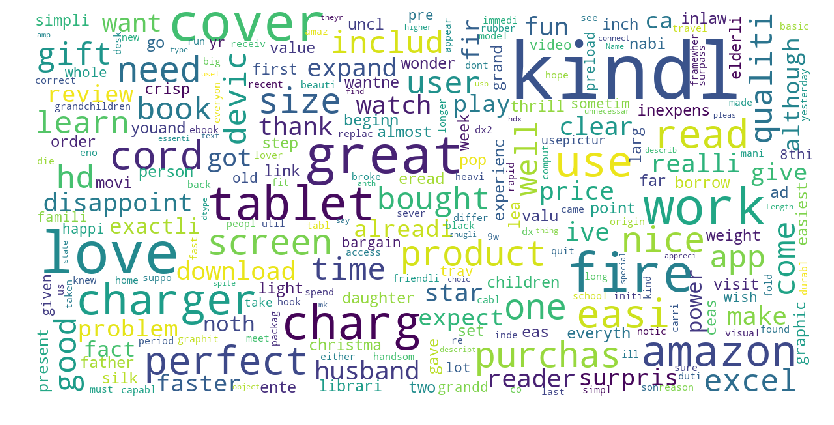

In [105]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['reviews.text']) 

In [112]:
from textblob import TextBlob
statement = "expensive tablet"
sentiment1 = TextBlob(statement).sentiment


In [113]:
sentiment1

Sentiment(polarity=-0.5, subjectivity=0.7)

In [114]:
def senti(x):
    return TextBlob(x).sentiment    

In [115]:
df['senti_score'] = df['reviews.text'].apply(senti)

In [116]:
df.senti_score.head()

0                                   (0.3, 0.8)
1                                (0.65, 0.675)
2                                   (0.0, 0.0)
3    (0.29545454545454547, 0.6492424242424243)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

In [76]:
df.shape

(34620, 8)